In [1]:
import osmnx as ox
import numpy as np
import matplotlib.pyplot as plt
import folium
from folium import CircleMarker
from folium import plugins
import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/srv/conda/envs/notebook/lib/python3.10/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shape

In [2]:
places = ['Central Administrative Okrug',
 'Northern Administrative Okrug',
 'North-Eastern Administrative Okrug',
 'Eastern Administrative Okrug',
 'South-Eastern Administrative Okrug',
 'Southern Administrative Okrug',
 'South-Western Administrative Okrug',
 'Western Administrative Okrug',
 'North-Western Administrative Okrug',
 'Zelenogradsky Administrative Okrug',
 'Novomoskovsky Administrative Okrug',
 'Troitsky Administrative Okrug']
local_crs = 32637

In [3]:
place = places[0] + ', Moscow'

In [4]:
area = ox.geocoder.geocode_to_gdf(place)
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((37.51393 55.75842, 37.51454 55.75809...",55.79717,55.71028,37.713519,37.51393,298606522,relation,2162196,55.753848,37.595464,"Central Administrative Okrug, Moscow, Central ...",boundary,administrative,0.841335


In [5]:
bus_stops = ox.geometries_from_place(place, tags={'amenity' : 'bus_station', 'public_transport':'stop_position'}).reset_index()

In [6]:
list(bus_stops.columns)

['element_type',
 'osmid',
 'alt_name',
 'esr:user',
 'name',
 'name:en',
 'public_transport',
 'railway',
 'train',
 'wikidata',
 'wikipedia',
 'geometry',
 'note',
 'subway',
 'layer',
 'location',
 'bus',
 'colour',
 'old_name',
 'description',
 'tram',
 'bench',
 'shelter',
 'bin',
 'name:ru',
 'wheelchair',
 'ref',
 'operator',
 'trolleybus',
 'nat_name',
 'official_name',
 'name:be',
 'name:uk',
 'network',
 'alt_name:en',
 'name:de',
 'name:fa',
 'loc_name:website',
 'official_name:esr',
 'official_name:esr:website',
 'official_name:express-3',
 'official_name:express-3:website',
 'official_name:website',
 'transport',
 'name:bg',
 'name:et',
 'name:fr',
 'name:it',
 'name:pt',
 'name:sv',
 'name:cs',
 'name:es',
 'name:pl',
 'loc_name',
 'alt_name:uk',
 'name:da',
 'name:hu',
 'name:no',
 'disused:station',
 'share_taxi',
 'nodes',
 'electrified',
 'frequency',
 'gauge',
 'railway:track_ref',
 'voltage']

In [7]:
lst = ['element_type',
 'osmid',
 'name',
 'public_transport',
 'geometry',
 ]

In [8]:
bus_stops = bus_stops.loc[bus_stops.geometry.type == 'Point']
bus_stops[lst].head()

,element_type,osmid,name,public_transport,geometry
0,node,61088516,Каланчёвская,stop_position,POINT (37.65181 55.77567)
1,node,148264083,Москва-Пассажирская-Павелецкая,stop_position,POINT (37.64082 55.72908)
2,node,242546357,Курская,stop_position,POINT (37.65823 55.75814)
3,node,252934401,Китай-город,stop_position,POINT (37.63332 55.75552)
4,node,255852202,NaN,stop_position,POINT (37.53644 55.75191)


In [9]:
clinics = ox.geometries_from_place(place, tags={'amenity' : 'clinic'}).reset_index()
clinics = clinics.loc[clinics.geometry.type == 'Point']

In [10]:
clinics.geometry

0      POINT (37.65674 55.73788)
1      POINT (37.60161 55.77536)
2      POINT (37.63219 55.78724)
3      POINT (37.57919 55.72642)
4      POINT (37.63505 55.76521)
                 ...            
373    POINT (37.65458 55.76470)
374    POINT (37.67726 55.76749)
375    POINT (37.60344 55.77463)
376    POINT (37.61873 55.73334)
377    POINT (37.57996 55.72868)
Name: geometry, Length: 378, dtype: geometry

<Axes: >

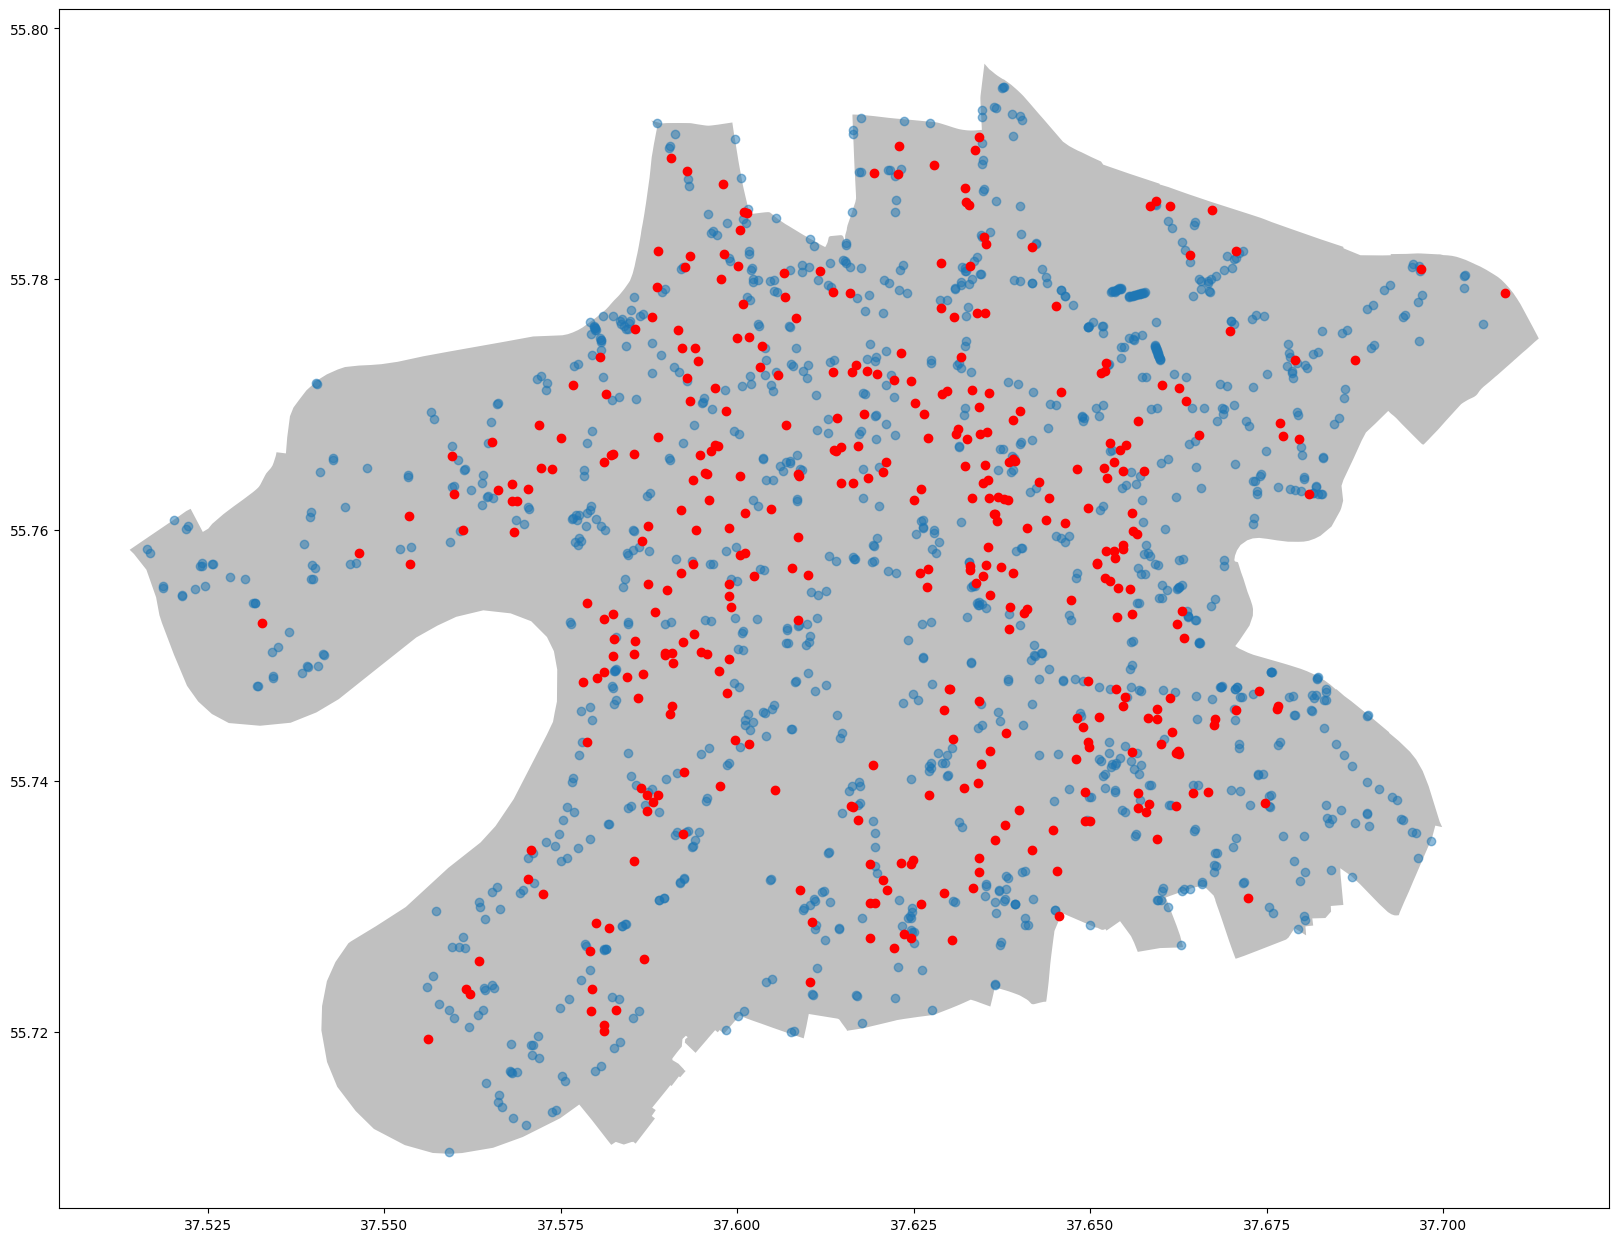

In [11]:
ax = area.plot(figsize=(20,20), color='silver')
bus_stops.plot(ax=ax, alpha=0.5)
clinics.plot(ax=ax, color='red')


In [12]:
# G_w = ox.graph_from_address(place, retain_all=True, network_type='walk', 
#                             simplify=True, clean_periphery=False)

In [13]:
# fig, ax = ox.plot_graph(G_w, node_zorder=2, node_color='w', bgcolor='k')

In [14]:
# ox.plot_graph_folium(G_w, popup_attribute='name', edge_width=2)


In [15]:
bus_X = [ x for x in bus_stops['geometry'].x]
bus_Y = [ x for x in bus_stops['geometry'].y]
clinic_X =  [ x for x in clinics['geometry'].x] 
clinic_Y = [ x for x in clinics['geometry'].y]

In [17]:
# Setup the coordinates of the map center and the zoom option.
map_osm = folium.Map(location=[55.758, 37.62], zoom_start=10)
# Add labels with coordinates.
folium.LatLngPopup().add_to(map_osm)
# Add the bus stops points to the basemap.
for lt, ln in zip(bus_X, bus_Y):
#         folium.Circle(location=[i,j], color="red", weight=5, opacity=0.7).add_to(map_osm)
    folium.Marker(
        location=[ln, lt],
        icon=folium.Icon(color='blue', prefix='fa',icon='bus'),
    ).add_to(map_osm)

for lt, ln in zip(clinic_X, clinic_Y):
    folium.Marker(
        location=[ln, lt],
        icon=folium.Icon(color='green', prefix='fa',icon='hospital'),
    ).add_to(map_osm)
    
minimap = plugins.MiniMap(toggle_display=True)
map_osm.add_child(minimap)
plugins.ScrollZoomToggler().add_to(map_osm)
plugins.Fullscreen(position="topright").add_to(map_osm)    

# Display the map.
map_osm